# Matplotlib, Pandas Visualization的使用

** 此系列的文件為Udemy的python金融分析課程系列筆記(https://www.udemy.com/python-for-finance-and-trading-algorithms) **

** 視覺化在金融分析是一個重要的部分，這邊包含了Matplotlib跟pandas的繪圖功能，本筆記介紹了簡單的使用 **



**先介紹Matplotlib，這個套件是使用是設計跟matlab的繪圖功能非常類似**

一般人會對這個套件混淆是因為他有兩種使用方法：使用方法或是使用物件呼叫

以下先介紹呼叫方法的範例

In [3]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline  
# 加此行就可以不用使用show()方法做顯示，如果不加記得在最後呼叫fig.show()方法把圖顯示出來

In [6]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

直接使用plt.plot方法把x,y數值放入

也有對應的方法直接設定xlabel,ylabel,title等等

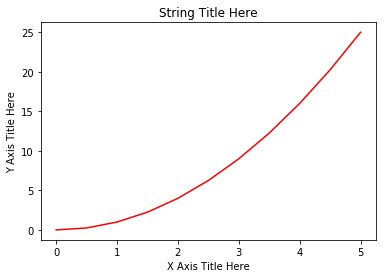

In [8]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
# plt.show()

可以用subplot去在同一張圖裡面放多個表格

subplot(1,2,1)代表一個row 兩個columns現在先看第一個 

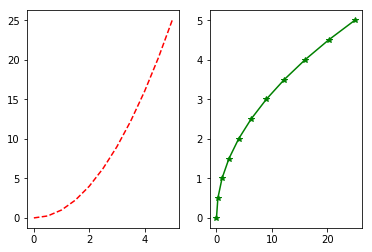

In [9]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

另外介紹使用物件呼叫的範例如下：

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

可以簡單地使用subplots指令直接定義figure跟子圖

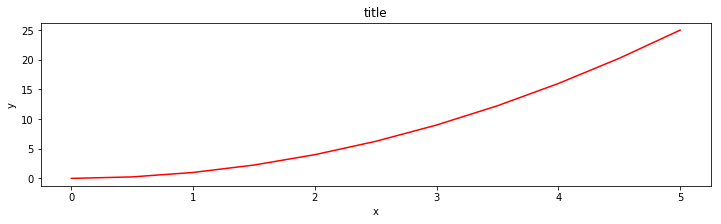

In [11]:
fig, axes = plt.subplots(figsize=(12,3))
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

如果要做影像的儲存可以用savefig指令，並且可以設定所需要的dpi（如果前面沒有設定的話）

In [ ]:
fig.savefig("filename.png", dpi=200)

使用legend()方法可以在圖上標示每條線的描述，但記得要在plot內部加註label變數

legend()內可以用loc參數調整legend的位置

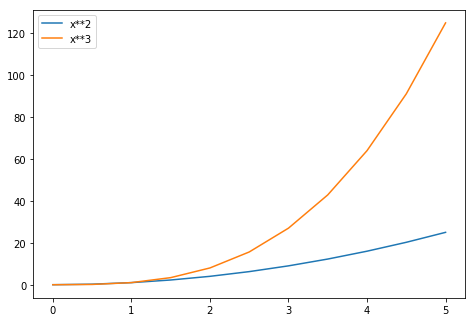

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend(loc=0)

在plot內部變數可以設定線的格式

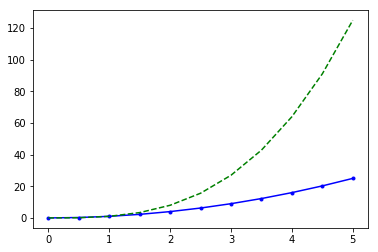

In [18]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')
ax.plot(x, x**3, 'g--')

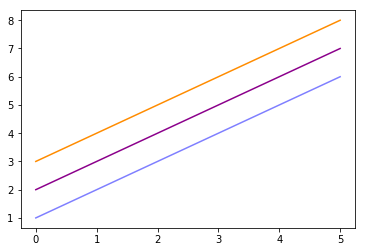

In [19]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) 
ax.plot(x, x+2, color="#8B008B")
ax.plot(x, x+3, color="#FF8C00") 

可以用set_xlim或set_ylim去調整要顯示的範圍

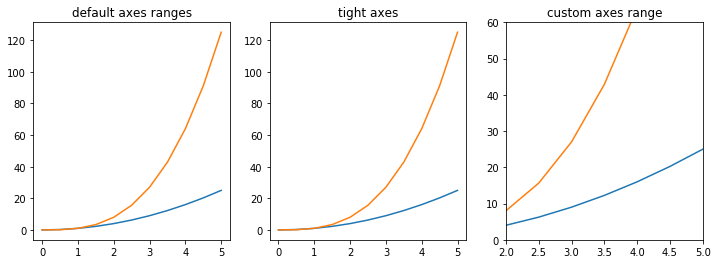

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

matplotlib還有一些其他的繪圖模式，以下列舉幾個為例

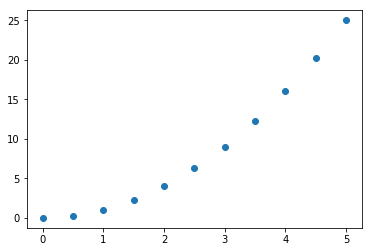

In [22]:
plt.scatter(x,y)

(array([ 14.,   8.,  10.,  10.,   6.,  13.,   9.,   8.,   8.,  14.]),
 array([   4. ,  103.5,  203. ,  302.5,  402. ,  501.5,  601. ,  700.5,
         800. ,  899.5,  999. ]),
 <a list of 10 Patch objects>)

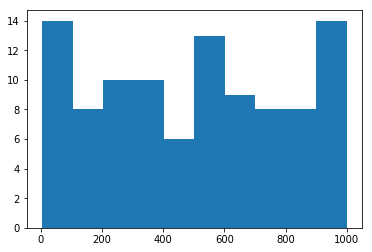

In [23]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

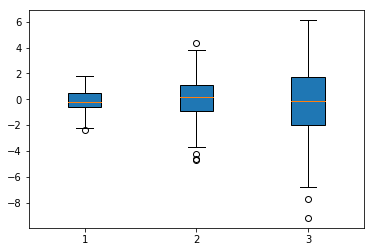

In [24]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

**另外還有pandas內建的繪圖功能**

在pandas內部可以直接使用matplotlib的功能，以下示範簡單的範例

使用上如果對matplotlib跟pandas稍有了解應該是很直觀的

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
df1 = pd.read_csv('df1',index_col=0)
df2 = pd.read_csv('df2')

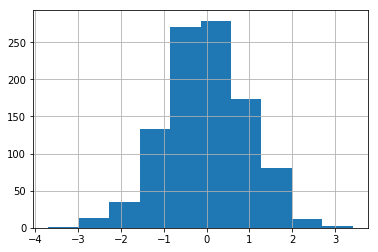

In [28]:
df1['A'].hist()

如果嫌pandas的繪圖格式太醜的話，有一些套件可以設定繪圖的風格

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

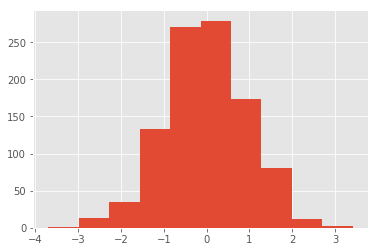

In [30]:
df1['A'].hist()

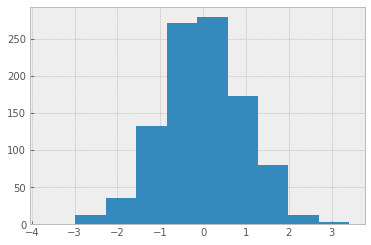

In [31]:
plt.style.use('bmh')
df1['A'].hist()

以下使用一些其他的繪圖類型，如同matplotlib可以設定alpha代表透明度

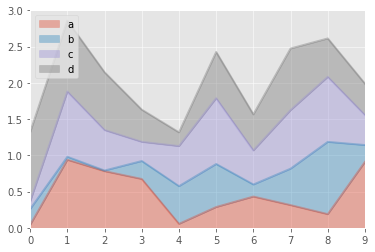

In [33]:
df2.plot.area(alpha=0.4)

In [34]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


使用長條圖的繪製

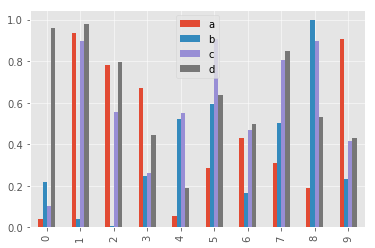

In [35]:
df2.plot.bar()

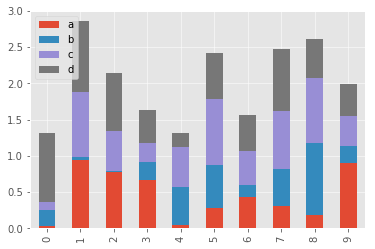

In [36]:
df2.plot.bar(stacked=True)

也可以使用bins設定分幾格

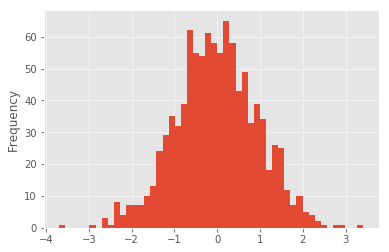

In [49]:
df1['A'].plot.hist(bins=50)

如同matplotlib有類似的參數可以設定

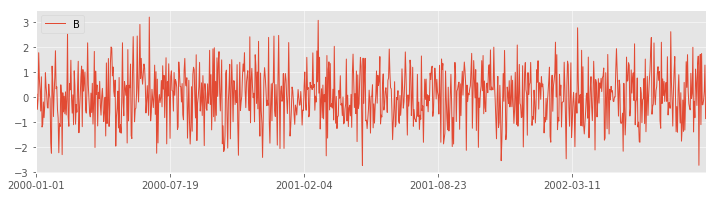

In [38]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

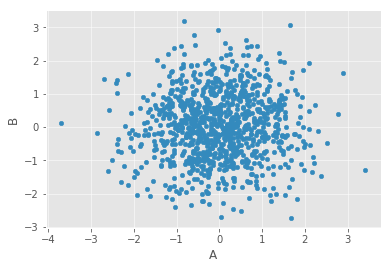

In [39]:
df1.plot.scatter(x='A',y='B')

也可以把一個維度拉出來做顏色的漸層

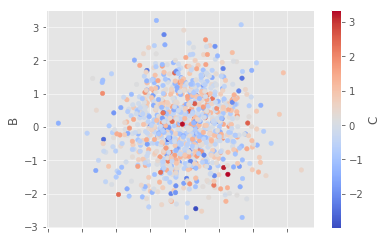

In [40]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

/usr/local/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


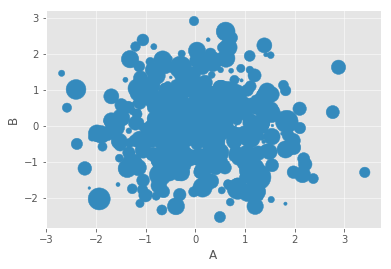

In [41]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200)

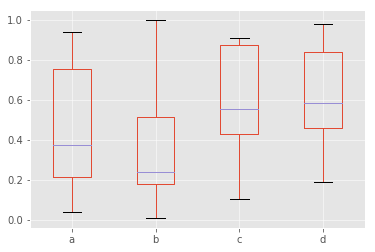

In [42]:
df2.plot.box() # Can also pass a by= argument for groupby

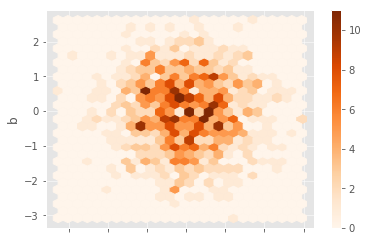

In [43]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

基本上kde跟density是類似的東西

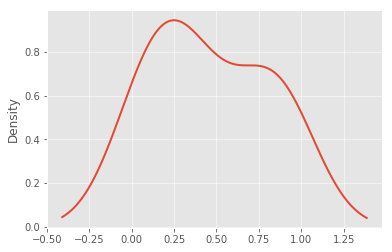

In [44]:
df2['a'].plot.kde()

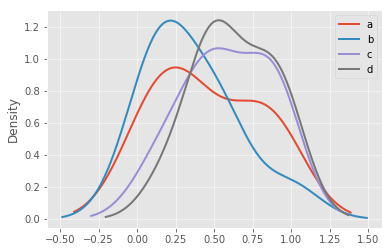

In [45]:
df2.plot.density()